In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.io as pio

print('setup completed')

setup completed


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Adidas US Sales Datasets.xlsx'

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Adidas US Sales Datasets.xlsx')

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [ ]:
#Vamos analisar vendas e lucro por Fornecedor, por estado, por produto e por dia da semana.

In [ ]:
df = df[3:].reset_index(drop=True)
df.columns = df.iloc[0]
df = df[1:]
df = df.drop(df.columns[0], axis = 1)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
5,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [ ]:
df.isna().sum()
df.duplicated().sum()

df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors='coerce')
df['Operating Margin'] = pd.to_numeric(df['Operating Margin'], errors='coerce')
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors = 'coerce')
df['weekday'] = df['Invoice Date'].dt.day_name()
df['day'] = df['Invoice Date'].dt.day
df['month'] = df['Invoice Date'].dt.month
df['year'] = df['Invoice Date'].dt.year
def weekend(x):
  return 'Yes' if x in ['Saturday', 'Sunday'] else 'No'

df['is_weekend'] = df['weekday'].apply(weekend)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,weekday,day,month,year,is_weekend
1,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,Wednesday,1,1,2020,No
2,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,Thursday,2,1,2020,No
3,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,Friday,3,1,2020,No
4,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,Saturday,4,1,2020,Yes
5,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,Sunday,5,1,2020,Yes


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method,weekday,day,month,year,is_weekend
1,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,Wednesday,1,1,2020,No
2,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,Thursday,2,1,2020,No
3,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,Friday,3,1,2020,No
4,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,Saturday,4,1,2020,Yes
5,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,Sunday,5,1,2020,Yes


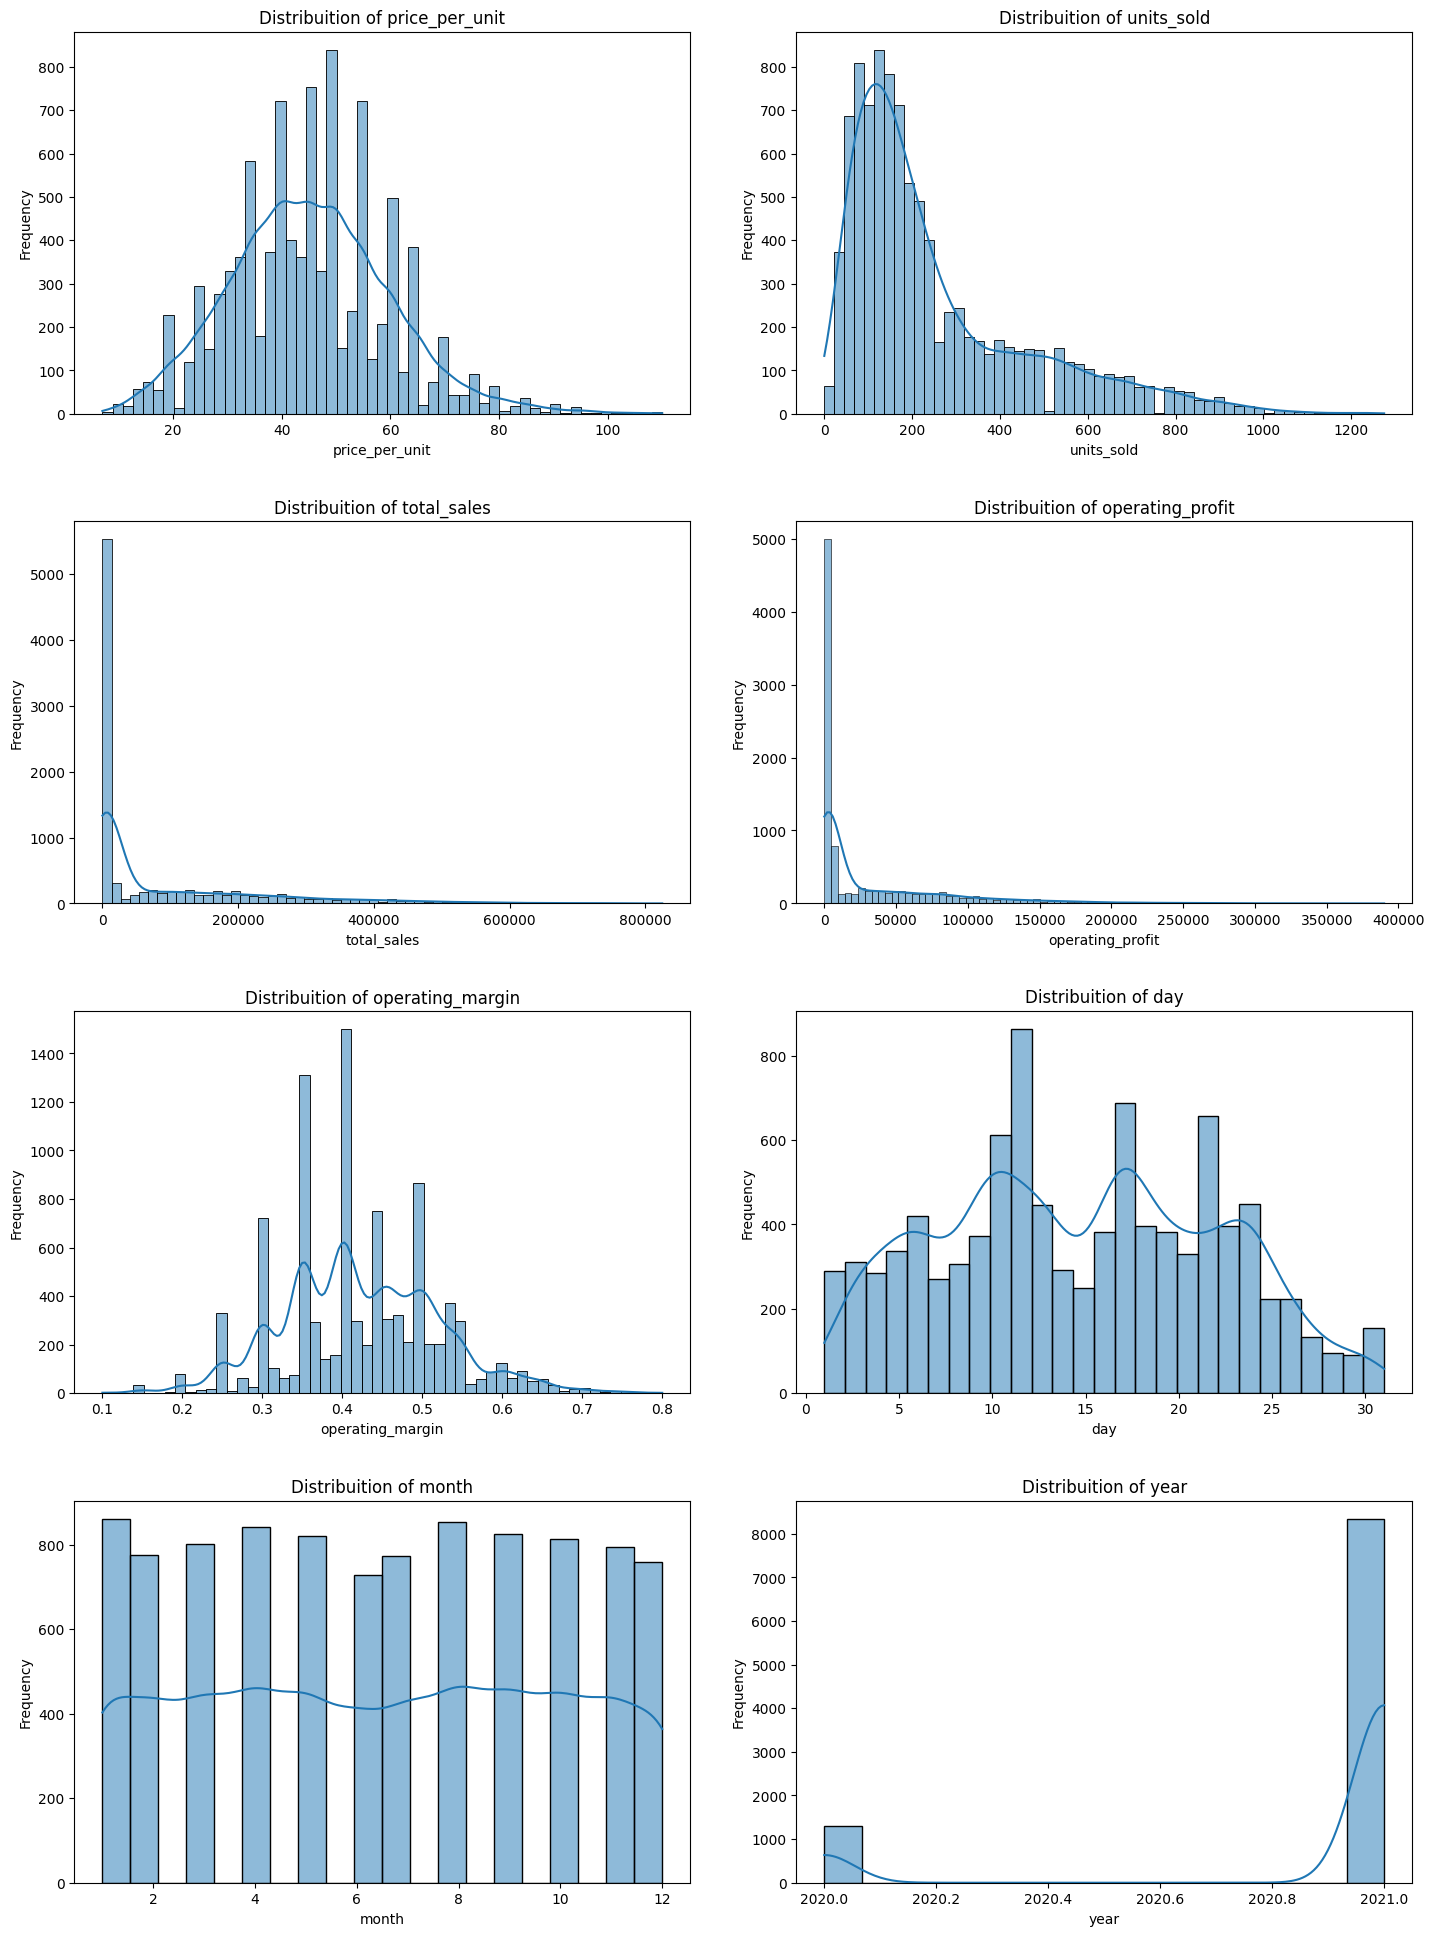

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
len(numerical_columns)

num_vars = len(numerical_columns)

cols = 2

rows = (num_vars // cols) + (num_vars % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

axes = axes.flatten()

# Loop para criar os histogramas
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuition of {col}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(pad=3)
plt.show()


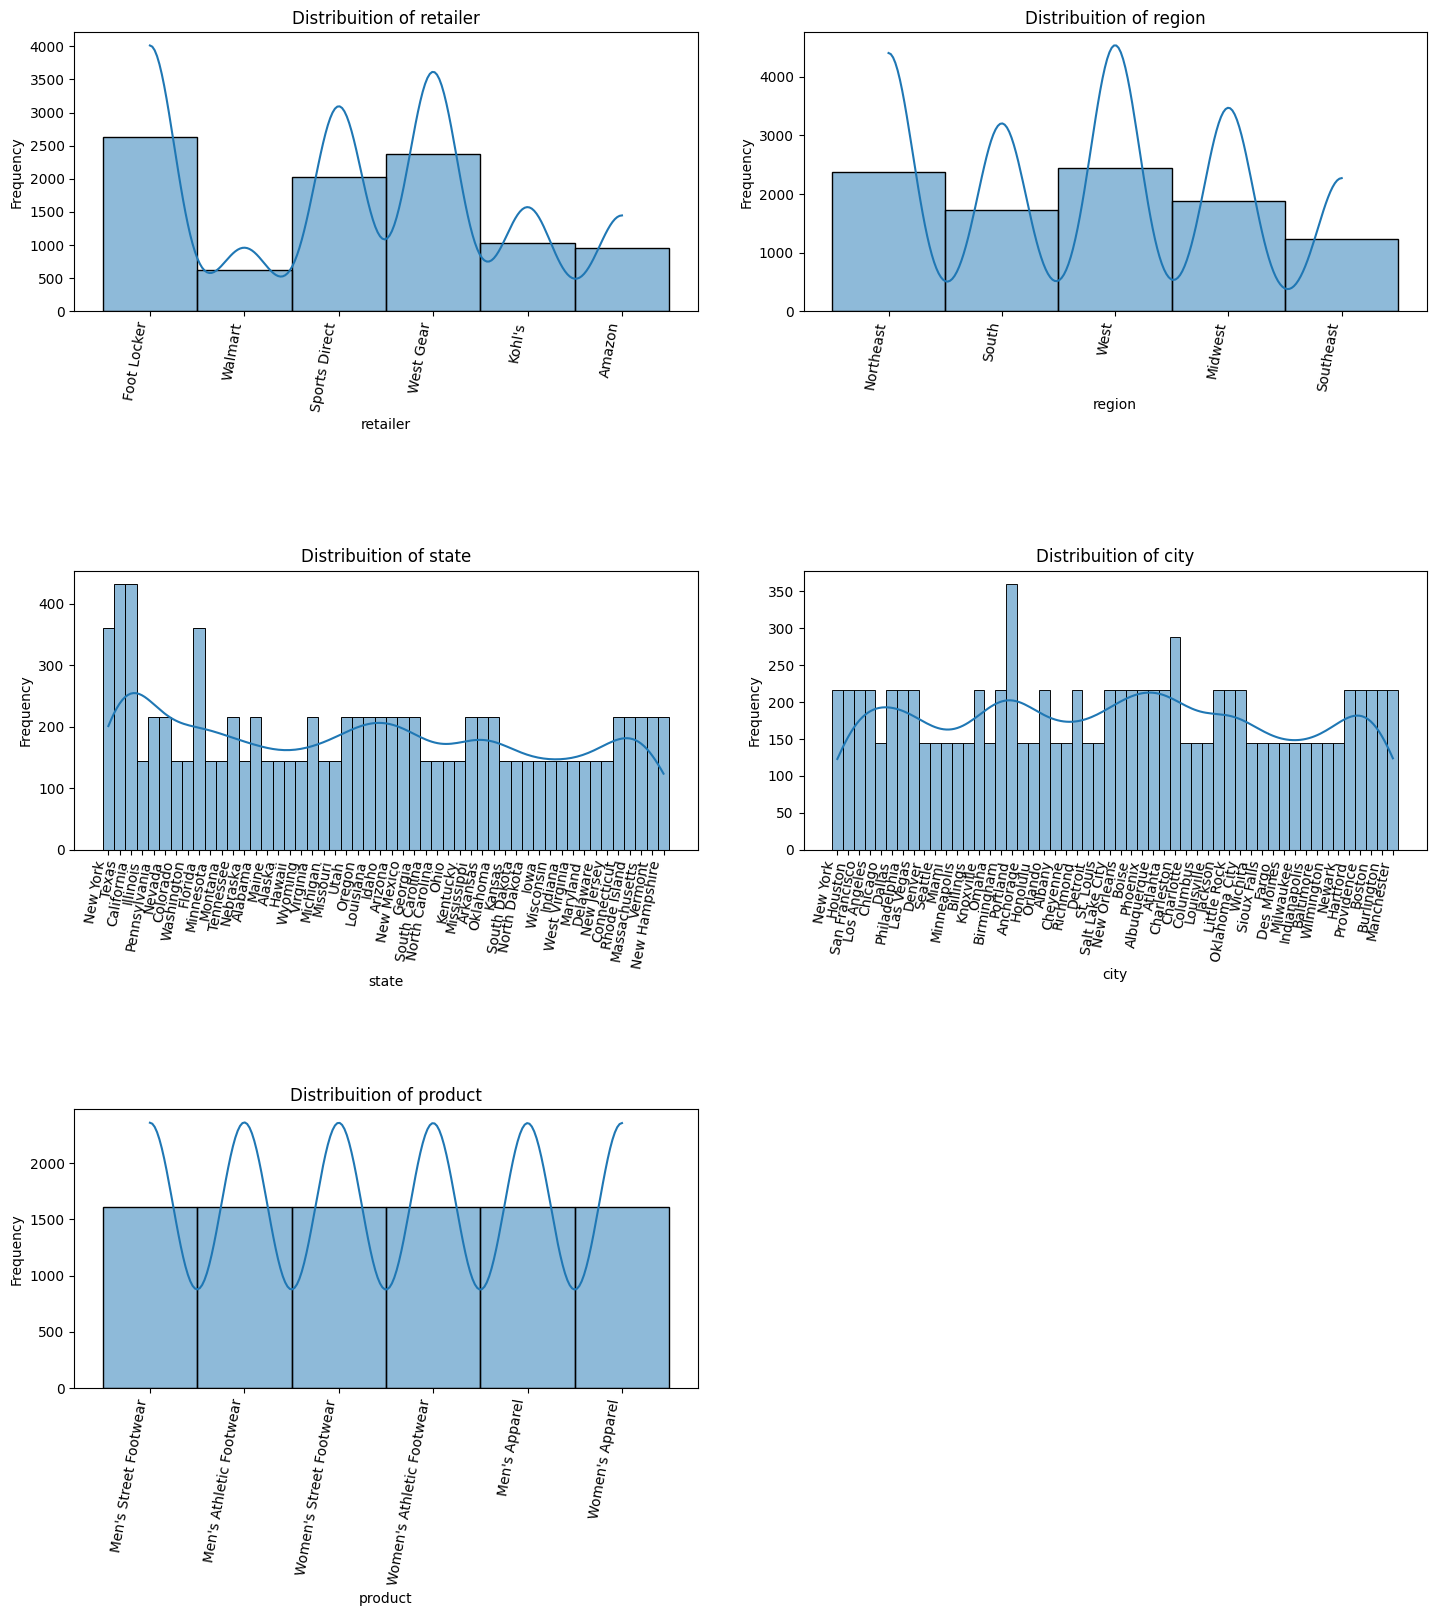

In [ ]:
columns = ['retailer','region', 'state', 'city', 'product']

len(columns)
cols = 2
rows = (num_vars // cols) + (num_vars % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(columns):
  sns.histplot(df[col], ax=axes[i], kde=True)
  axes[i].set_title(f'Distribuition of {col}')
  axes[i].set_ylabel('Frequency')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=80, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

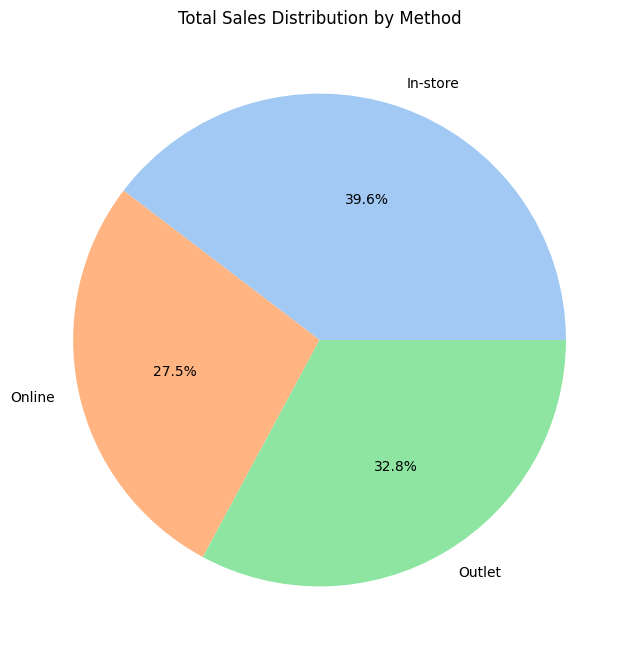

In [ ]:
df_salesmethod = df.groupby('sales_method')['total_sales'].sum().reset_index()

plt.figure(figsize=(10,8))
plt.pie(
    data = df_salesmethod,
    x = 'total_sales',
    labels = 'sales_method',
    autopct = '%1.1f%%',
    colors = sns.color_palette('pastel')
)

plt.title('Total Sales Distribution by Method')
plt.show()

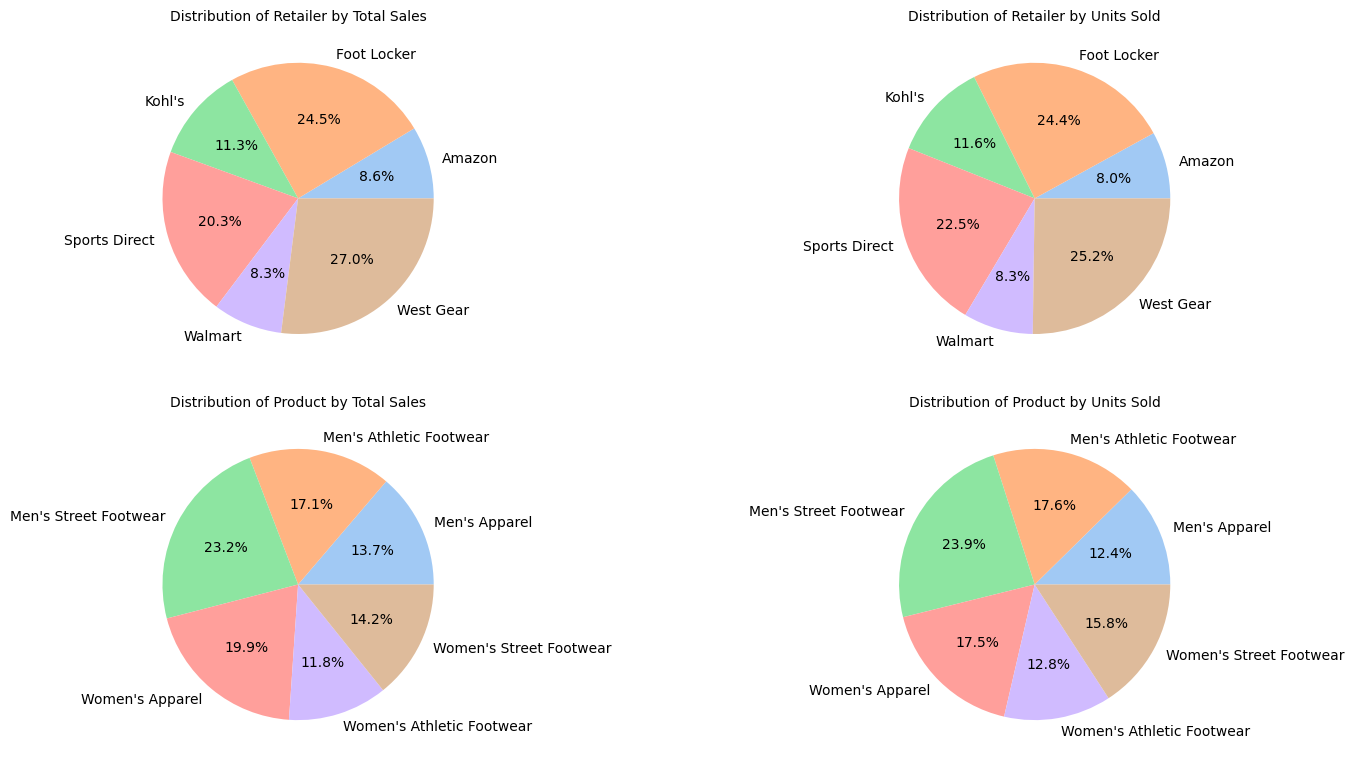

In [ ]:

df_retailer = df.groupby('retailer')[['total_sales','units_sold']].sum().reset_index()
df_product = df.groupby('product')[['total_sales','units_sold']].sum().reset_index()



fig, axes = plt.subplots(2,2, figsize=(15,8))
axes = axes.flatten()


axes[0].pie( data= df_retailer, x= 'total_sales', labels='retailer', autopct='%1.1f%%', colors = sns.color_palette('pastel'))
axes[0].set_title('Distribution of Retailer by Total Sales', fontsize = 10)

axes[1].pie( data= df_retailer, x= 'units_sold', labels='retailer', autopct='%1.1f%%',colors = sns.color_palette('pastel'))
axes[1].set_title('Distribution of Retailer by Units Sold', fontsize = 10)

axes[2].pie( data= df_product, x= 'total_sales', labels='product', autopct='%1.1f%%',colors = sns.color_palette('pastel'))
axes[2].set_title('Distribution of Product by Total Sales', fontsize = 10)

axes[3].pie( data= df_product, x= 'units_sold', labels='product', autopct='%1.1f%%', colors = sns.color_palette('pastel'))
axes[3].set_title('Distribution of Product by Units Sold', fontsize = 10)

plt.tight_layout(pad=2)
plt.show()

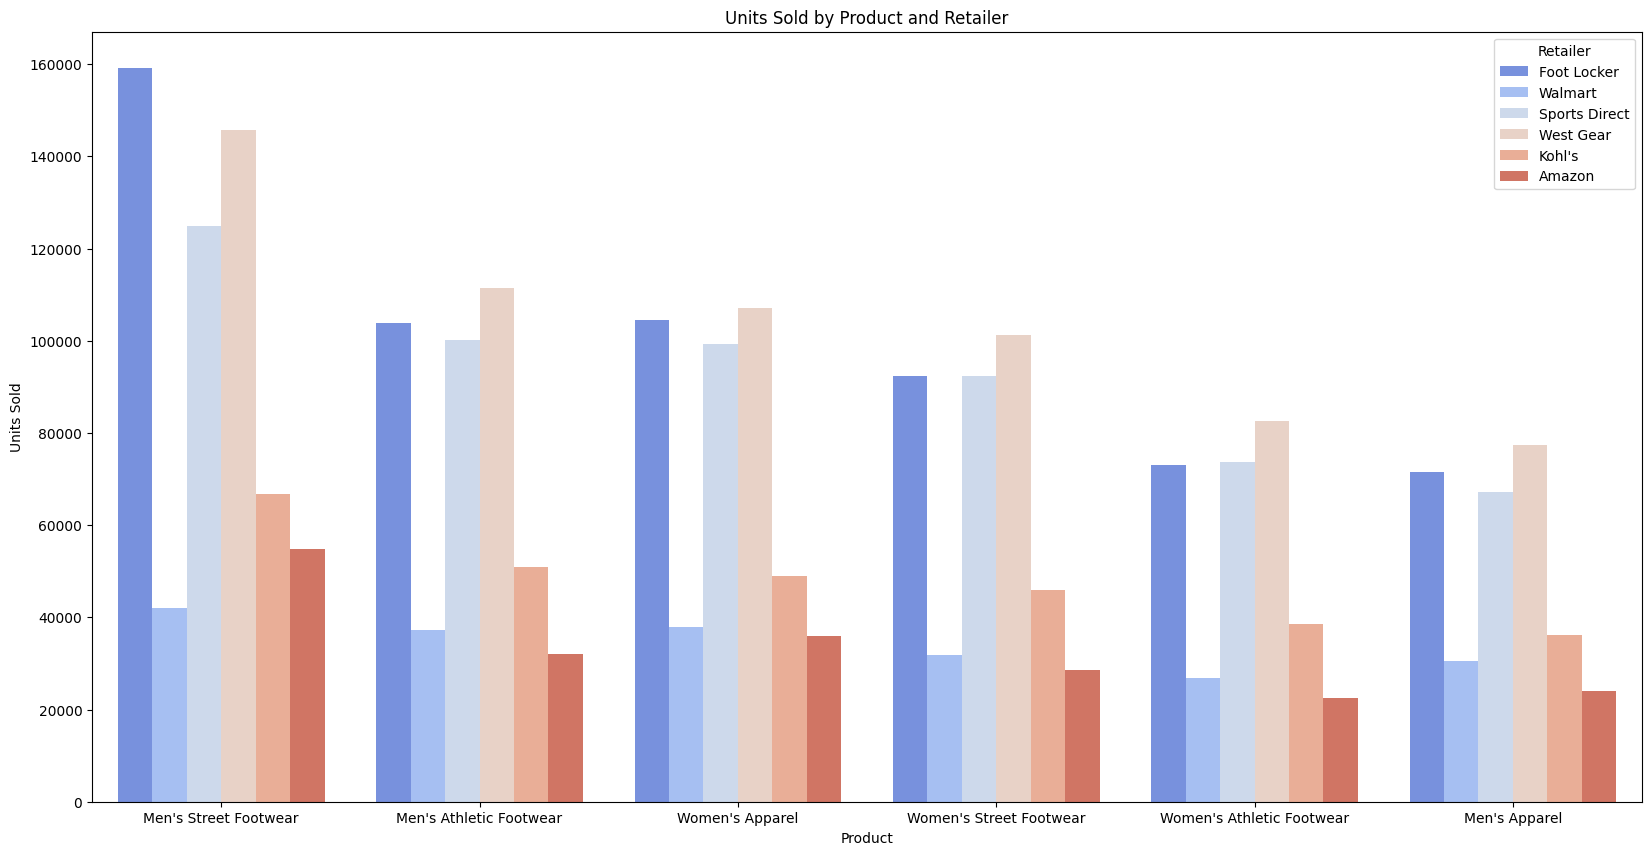

In [ ]:
#Somar quantidade de cada produto vendido por Retailer

plt.figure(figsize=(20,10))
sns.barplot(
    data = df,
    x = 'product',
    y='units_sold',
    hue = 'retailer',
    estimator = np.sum,
    errorbar= None,
    palette='coolwarm',
    order = df.groupby('product')['units_sold'].sum().sort_values(ascending=False).index
)


plt.legend(title = 'Retailer')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Units Sold by Product and Retailer')
plt.show()

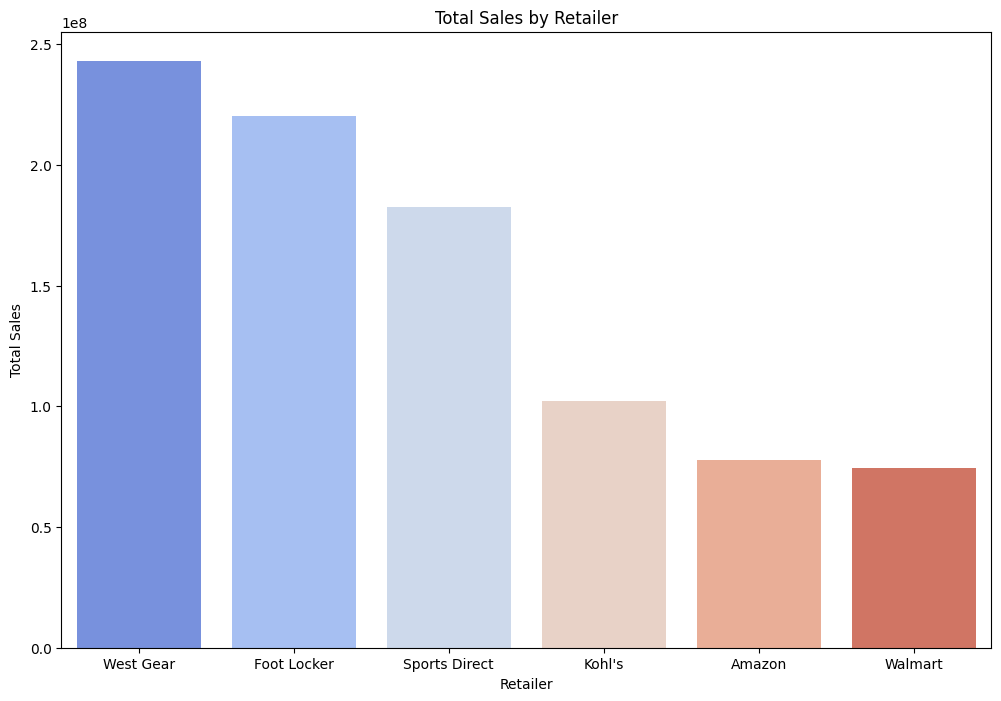

In [ ]:
#Comparsion by Retailer

plt.figure(figsize=(12,8))

sns.barplot(
    data = df,
    x = 'retailer',
    y='total_sales',
    estimator = np.sum,
    errorbar= None,
    palette='coolwarm',
    order= df.groupby('retailer')['total_sales'].sum().sort_values(ascending=False).index
)

plt.title('Total Sales by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')


plt.show()

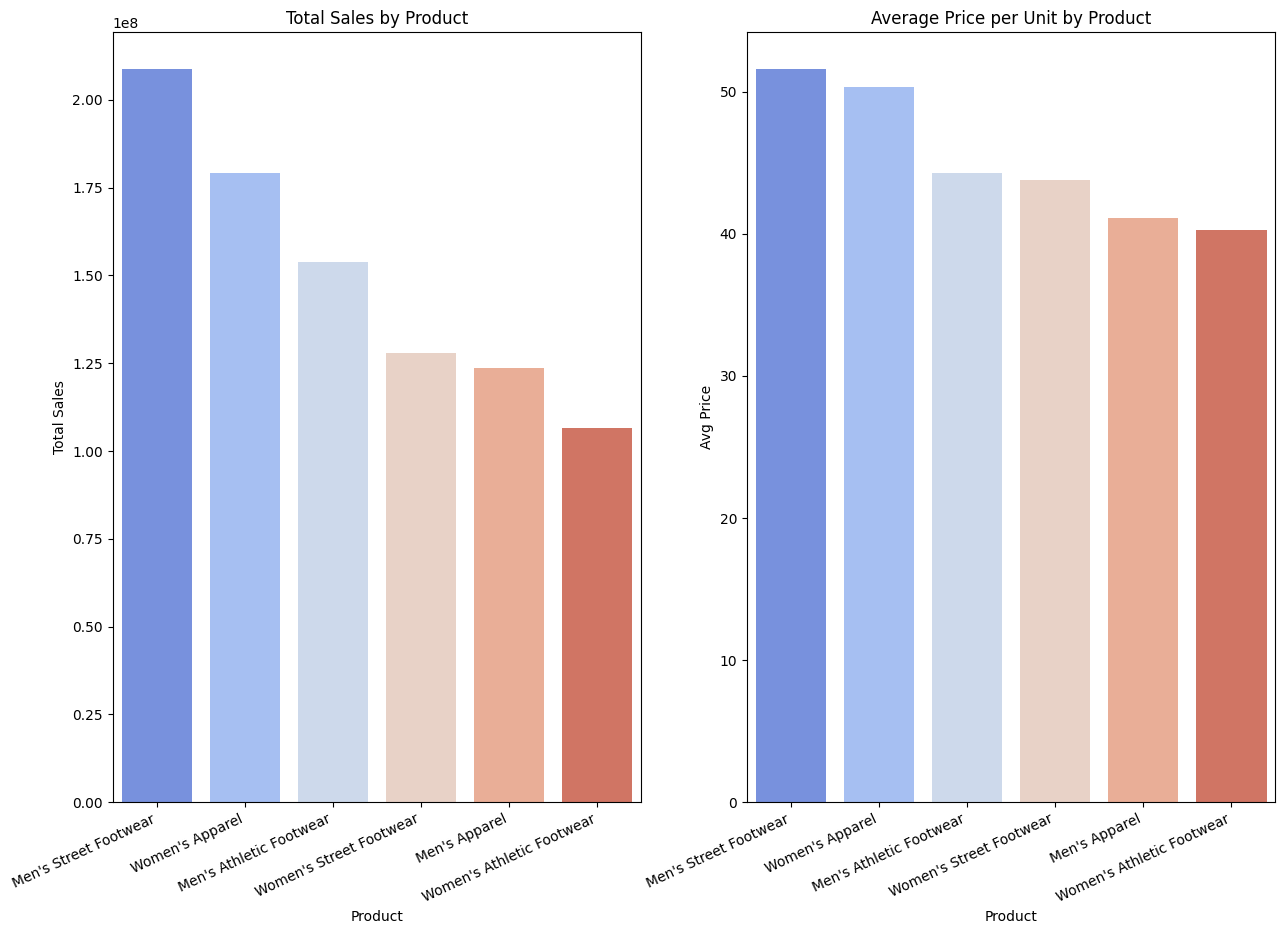

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,10))
axes = axes.flatten()

sns.barplot(
    data = df,
    x = 'product',
    y='total_sales',
    estimator = np.sum,
    errorbar= None,
    palette='coolwarm',
    order= df.groupby('product')['total_sales'].sum().sort_values(ascending=False).index,
    ax = axes[0]
)

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=25, ha = 'right')
axes[0].set_title('Total Sales by Product')
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Total Sales')

sns.barplot(
    data = df,
    x = 'product',
    y='price_per_unit',
    estimator = np.mean,
    errorbar= None,
    palette='coolwarm',
    order= df.groupby('product')['price_per_unit'].mean().sort_values(ascending=False).index,
    ax = axes[1]
)
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=25, ha = 'right')
axes[1].set_title('Average Price per Unit by Product')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Avg Price')

plt.show()

In [ ]:
df_product = df.groupby('invoice_date')['total_sales'].sum().reset_index()
trace = go.Scatter(x=df_product['invoice_date'], y=df_product['total_sales'], mode='lines')

layout = go.Layout(
    title='Sales of Adidas Across Days',
    xaxis_title='Date',
    yaxis_title='Total Sales',
    legend=dict(x=0, y=1.0),
    margin=dict(l=80, r=80, t=40, b=40),
    height=500,
    width=1100,
)

fig = go.Figure(data= [trace] , layout=layout)

pio.show(fig)

In [ ]:
df_city = df.groupby('city')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False)
trace = go.Bar(x=df_city['city'], y=df_city['total_sales'])

layout = go.Layout(
    title='Sales of Adidas by City',
    xaxis_title='City',
    yaxis_title='Total Sales',
    legend=dict(x=0, y=1.0),
    margin=dict(l=80, r=80, t=40, b=40),
    height=500,
    width=1100,
)

fig = go.Figure(data= [trace] , layout=layout)

pio.show(fig)

In [ ]:
df_state = df.groupby('state')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
trace = go.Bar(x=df_state['state'], y=df_state['total_sales'])

layout = go.Layout(
    title='Sales of Adidas by State',
    xaxis_title='State',
    yaxis_title='Total Sales',
    legend=dict(x=0, y=1.0),
    margin=dict(l=80, r=80, t=40, b=40),
    height=500,
    width=1100,
)

fig = go.Figure(data= [trace] , layout=layout)

pio.show(fig)

In [ ]:
df_region = df.groupby('region')['total_sales'].sum().reset_index()
trace = go.Bar(x=df_region['region'], y=df_region['total_sales'])

layout = go.Layout(
    title='Sales of Adidas by Region',
    xaxis_title='Region',
    yaxis_title='Total Sales',
    legend=dict(x=0, y=1.0),
    margin=dict(l=80, r=80, t=40, b=40),
    height=500,
    width=1100,
)

fig = go.Figure(data= [trace] , layout=layout)

pio.show(fig)

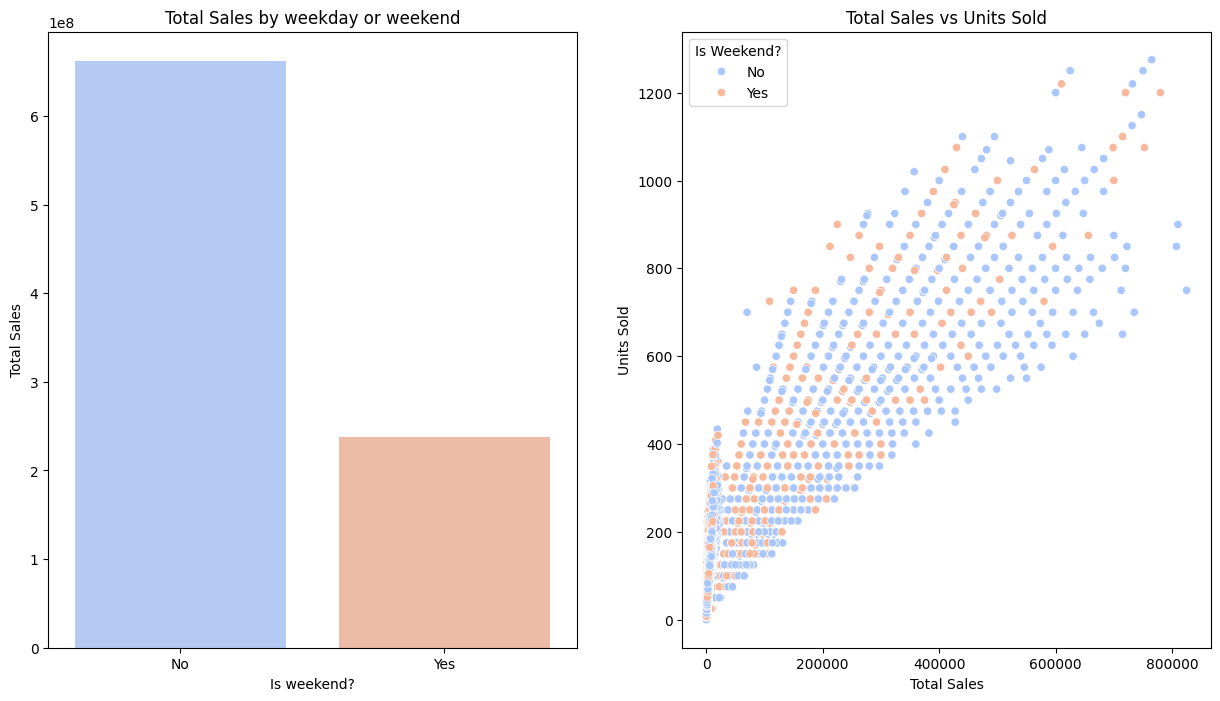

In [ ]:

fig, axes = plt.subplots(1,2, figsize=(15,8))
axes = axes.flatten()

sns.scatterplot(
    data = df,
    x = 'total_sales',
    y= 'units_sold',
    hue= 'is_weekend',
    ax = axes[1],
    palette = 'coolwarm'
)

axes[1].legend(loc='upper left', title = 'Is Weekend?')
axes[1].set_title('Total Sales vs Units Sold')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('Units Sold')


sns.barplot(
    data = df,
    x = 'is_weekend',
    y = 'total_sales',
    estimator = np.sum,
    ax = axes[0],
    errorbar = None,
    palette = 'coolwarm'
)

axes[0].set_title('Total Sales by weekday or weekend')
axes[0].set_xlabel('Is weekend?')
axes[0].set_ylabel('Total Sales')


plt.show()

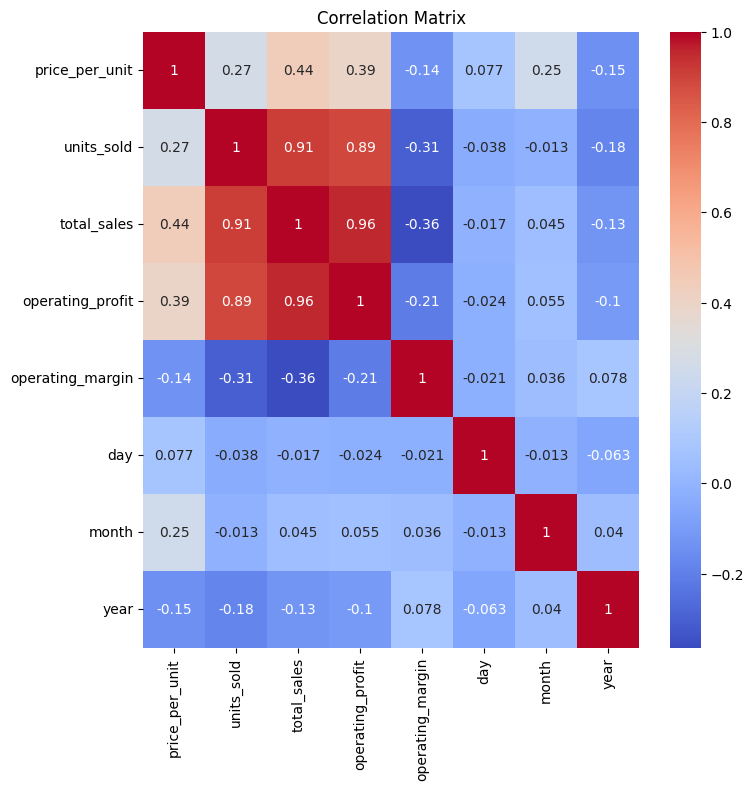

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])

numeric_columns.corr()

plt.figure(figsize=(8,8))
sns.heatmap(
    numeric_columns.corr(),
    annot = True,
    cmap = 'coolwarm',
    cbar = True
)

plt.xlabel('')
plt.ylabel('')
plt.title('Correlation Matrix')

plt.show()

In [ ]:
feature = ['price_per_unit','units_sold','operating_profit','operating_margin']

y = df['total_sales']
X = df[feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R2 Score: {r2}')

R2 Score: 0.9545812731391019
